## PROYECTO 

**Equipo:**

Carolina Barba Anaya (if720071)

Marco Antonio Ochoa Cárdenas (if720072)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as st 
from scipy import optimize as opt 


In [2]:
data = pd.read_csv(r'C:\Users\Caro\Documents\Carolina\Semestre 7\SPF\Proyecto_CBarba_MOchoa\diabetes.csv') #imporatción de datos
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
glucose= pd.DataFrame(data['Glucose'])# extracción de columna glucose
strokeBy_glucose = glucose.join(pd.DataFrame(data['Outcome']))# creación de un dataframe que contiene tanto a la columna glucose como a stroke
strokes = strokeBy_glucose['Outcome']==1#creación de filtro
strokeBy_glucose=strokeBy_glucose[strokes]#aplicación de filtro
strokeBy_glucose=strokeBy_glucose.set_index(np.arange(len(strokeBy_glucose))) # generación de nuevo indice

##### Nodo 1 : ataques cardiacos en base a nivel de azucar en sangre

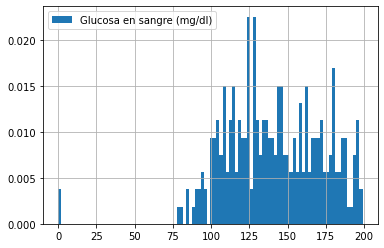

In [4]:
mu = np.mean(strokeBy_glucose['Glucose']); sigma = np.std(strokeBy_glucose)
divisiones = 100
plt.hist(strokeBy_glucose['Glucose'],divisiones,density=True,label='Glucosa en sangre (mg/dl)')
plt.legend(loc='best')
plt.grid()
plt.show()